In [277]:
# https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("charts.csv")

In [6]:
df.date.min(), df.date.max()

('1958-08-04', '2021-11-06')

In [7]:
# Top artists
df.artist.value_counts()

Taylor Swift                                      1023
Elton John                                         889
Madonna                                            857
Drake                                              787
Kenny Chesney                                      769
                                                  ... 
RiceGum Featuring Alissa Violet                      1
XXXTENTACION Featuring PnB Rock & Trippie Redd       1
Justin Bieber Featuring Burna Boy                    1
Justin Bieber Featuring BEAM                         1
Frankie Vaughan                                      1
Name: artist, Length: 10205, dtype: int64

In [8]:
# Longest in charts
df.sort_values(by="weeks-on-board", ascending=True).iloc[50_000:]

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
259625,1972-02-05,39,My World,Bee Gees,65.0,39,2
259626,1972-02-05,40,Everything I Own,Bread,60.0,40,2
17466,2018-07-07,67,Bed,Nicki Minaj Featuring Ariana Grande,43.0,43,2
260181,1972-01-01,95,Do The Funky Penguin Part I,Rufus Thomas,97.0,95,2
259676,1972-02-05,90,Runaway/Happy Together,Dawn Featuring Tony Orlando,99.0,90,2
...,...,...,...,...,...,...,...
1215,2021-08-14,16,Blinding Lights,The Weeknd,17.0,1,87
39148,2014-05-10,49,Radioactive,Imagine Dragons,48.0,3,87
1117,2021-08-21,18,Blinding Lights,The Weeknd,16.0,1,88
1020,2021-08-28,21,Blinding Lights,The Weeknd,18.0,1,89


In [9]:
df["date"] = pd.to_datetime(df["date"])

In [10]:
df[df.artist=="Drake"].song.value_counts()

God's Plan                36
Hotline Bling             36
Controlla                 26
Nice For What             25
Headlines                 25
                          ..
From Florida With Love     1
Landed                     1
When To Say When           1
Deep Pockets               1
Final Fantasy              1
Name: song, Length: 108, dtype: int64

In [11]:
df[df.artist=="Elton John"].song.value_counts()

Candle In The Wind 1997/Something About The Way You Look Tonight               42
Can You Feel The Love Tonight (From "The Lion King")                           26
I Guess That's Why They Call It The Blues                                      23
The One                                                                        22
Candle In The Wind                                                             21
Little Jeannie                                                                 21
Blessed                                                                        20
Believe                                                                        20
Circle Of Life (From "The Lion King")                                          20
The Last Song                                                                  20
Recover Your Soul                                                              20
Sad Songs (say So Much)                                                        19
I Don't Wanna Go

In [12]:
def chart_performance(artist, song):
    data = df[(df["artist"] == artist) & (df["song"] == song)]
    data = data.sort_values(by="date").reset_index(drop=True)
    data["date_rel"] = pd.to_timedelta(data["date"] - data["date"][0]).dt.days
    return data

In [13]:
test_cases = {
    "Taylor Swift": "You Belong With Me",
    "Drake": "God's Plan",
    "Elton John": "Candle In The Wind 1997/Something About The Way You Look Tonight",
    "The Weeknd": "Blinding Lights",
    "Elvis Presley": "Please Don't Stop Loving Me"
}

In [14]:
taylor = chart_performance("Taylor Swift", "You Belong With Me")
drake = chart_performance("Drake", "God's Plan")
elton = chart_performance("Elton John", "Candle In The Wind 1997/Something About The Way You Look Tonight")
weeknd = chart_performance("The Weeknd", "Blinding Lights")
elvis = chart_performance("Elvis Presley", "Please Don't Stop Loving Me")

In [15]:
import matplotlib.pyplot as plt

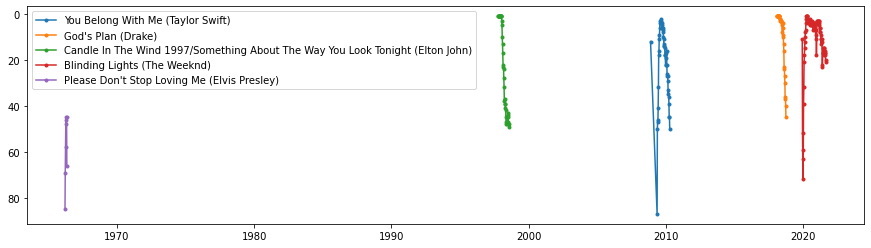

In [16]:
_, ax = plt.subplots(figsize=(15,4))

for artist, song in test_cases.items():
    data = chart_performance(artist, song)
    x = data["date"].values
    y = data["rank"].values

    ax.plot(x, y, marker=".", label=f"{song} ({artist})")

plt.gca().invert_yaxis()
plt.legend()
plt.show()

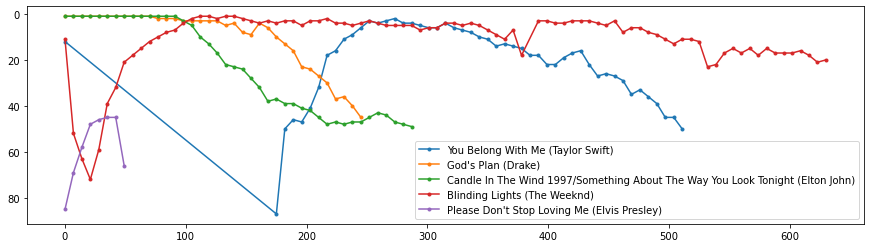

In [17]:
_, ax = plt.subplots(figsize=(15,4))

for artist, song in test_cases.items():
    data = chart_performance(artist, song)
    x = data["date_rel"].values
    y = data["rank"].values

    ax.plot(x, y, marker=".", label=f"{song} ({artist})")

plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [18]:
# TODO: remove lines for missing weeks (gaps in curves)
# add two cases:
#  - short duration but high peak
#  - long duration but low peak

In [19]:
# Q: can we predict a song's survival using the features given in the data?
# --> at least introduce notion of training/test data and discuss the epistemological problem of using 'all' historical 
# sources for explanation

In [20]:
# Try other data: https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features

In [21]:
df_charts = pd.read_csv("Hot Stuff.csv", index_col=0)
df_charts["WeekID"] = pd.to_datetime(df_charts["WeekID"])

In [22]:
df_charts.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
index,,,,,,,,,,
0,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-24,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-31,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,1965-08-07,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,1965-08-14,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8


In [23]:
df_audio = pd.read_csv("Hot 100 Audio Features.csv", index_col=0)

In [24]:
df_audio.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
index,,,,,,,,,,,,,,,,,,,,,
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,0.588,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),0.759,...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0


In [73]:
d = df_charts.merge(df_audio)

In [74]:
d.shape

(330208, 29)

In [75]:
d["WeekID"] = pd.to_datetime(d["WeekID"])

In [76]:
d.sample(10)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
95610,http://www.billboard.com/charts/hot-100/1995-0...,1995-06-10,95,Secret Garden,Bruce Springsteen,Secret GardenBruce Springsteen,1,76.0,63,7,...,-16.560,1.0,0.0266,0.4940,0.099900,0.1170,0.131,86.830,4.0,62.0
71803,http://www.billboard.com/charts/hot-100/1998-0...,1998-06-20,6,Everybody [Backstreet's Back],Backstreet Boys,Everybody [Backstreet's Back]Backstreet Boys,1,6.0,4,10,...,-3.493,0.0,0.0402,0.0250,0.000003,0.2650,0.586,108.021,4.0,63.0
245085,http://www.billboard.com/charts/hot-100/1965-1...,1965-11-20,27,Make Me Your Baby,Barbara Lewis,Make Me Your BabyBarbara Lewis,1,19.0,11,11,...,-15.879,1.0,0.0402,0.7010,0.000058,0.6710,0.649,110.040,4.0,28.0
9320,https://www.billboard.com/charts/hot-100/2020-...,2020-09-19,72,7 Summers,Morgan Wallen,7 SummersMorgan Wallen,1,56.0,6,4,...,-5.130,1.0,0.0328,0.4170,0.000061,0.1250,0.571,203.903,4.0,75.0
120792,http://www.billboard.com/charts/hot-100/1969-1...,1969-10-25,8,Baby It's You,Smith,Baby It's YouSmith,1,13.0,8,8,...,-10.648,0.0,0.0304,0.0177,0.071200,0.2600,0.694,95.398,4.0,45.0
139253,http://www.billboard.com/charts/hot-100/2004-1...,2004-10-30,73,Flap Your Wings,Nelly,Flap Your WingsNelly,1,66.0,52,9,...,-3.975,1.0,0.0617,0.0246,0.000001,0.0874,0.858,105.623,4.0,43.0
308885,http://www.billboard.com/charts/hot-100/1975-0...,1975-01-04,69,"Whatever You Got, I Want",Jackson 5,"Whatever You Got, I WantJackson 5",1,60.0,38,11,...,-6.994,0.0,0.0547,0.2550,0.000000,0.0792,0.928,76.892,4.0,21.0
231557,http://www.billboard.com/charts/hot-100/2006-0...,2006-09-30,34,Hate Me,Blue October,Hate MeBlue October,1,34.0,32,23,...,-5.724,0.0,0.0356,0.5130,0.000000,0.0980,0.202,92.166,4.0,59.0
232458,http://www.billboard.com/charts/hot-100/1966-0...,1966-05-14,89,It's Over,Jimmie Rodgers,It's OverJimmie Rodgers,1,NaN,89,1,...,-24.218,1.0,0.0311,0.9180,0.000120,0.1510,0.603,95.650,4.0,6.0
16052,https://www.billboard.com/charts/hot-100/2019-...,2019-01-05,70,Break Da Law,21 Savage,Break Da Law21 Savage,1,NaN,70,1,...,-7.823,1.0,0.3460,0.0493,0.000000,0.2560,0.359,141.039,4.0,61.0


In [77]:
## BOOTSTRAP!

# d = d.sample(500_000, replace=True)

In [78]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330208 entries, 0 to 330207
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   url                        330208 non-null  object        
 1   WeekID                     330208 non-null  datetime64[ns]
 2   Week Position              330208 non-null  int64         
 3   Song                       330208 non-null  object        
 4   Performer                  330208 non-null  object        
 5   SongID                     330208 non-null  object        
 6   Instance                   330208 non-null  int64         
 7   Previous Week Position     298048 non-null  float64       
 8   Peak Position              330208 non-null  int64         
 9   Weeks on Chart             330208 non-null  int64         
 10  spotify_genre              315700 non-null  object        
 11  spotify_track_id           287066 non-null  object  

In [79]:
from IPython.display import Audio, HTML

In [80]:
Audio(url=d.loc[1000,"spotify_track_preview_url"])

In [81]:
def curves(performer, song):
    data = d[(d.Performer == performer) & (d.Song == song)].sort_values(by="WeekID").reset_index(drop=True)
    data["date_rel"] = pd.to_timedelta(data["WeekID"] - data["WeekID"][0]).dt.days
    x = data["date_rel"].values # or date_rel or WeekID
    y = data["Week Position"].values
    return x,y

In [82]:
test_cases2 = {
    "Patty Duke": "Don't Just Stand There",
    "Ace Of Base": "Don't Turn Around",
    "Dan + Shay": "Speechless",
    "YoungBloodZ Featuring Lil Jon": "Damn!",
    "K-Ci & JoJo": "All My Life",
    "Trevor Daniel": "Falling"
}

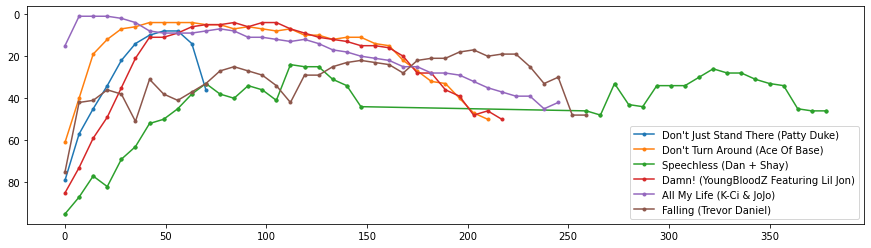

In [83]:
_, ax = plt.subplots(figsize=(15,4))

for performer, song in test_cases2.items():
    x,y = curves(performer, song)
    ax.plot(x, y, marker=".", label=f"{song} ({performer})")

plt.gca().invert_yaxis()
plt.legend()
plt.show()

Modeling the life of a song in the Top 100:

We assume that once a song has left the Top 100, it is impossible to re-enter (even though that does happen, of course)

1. Each song has a starting rank $r_0$.
2. For each following week, there is a bernoulli dropout probability $\theta$ that determines whether a song remains in the charts.
3. 

In [84]:
# Observation: Genres tend to leave the Top 100 higher than they entered them

In [85]:
entrances = []
peaks = []
exits = []

for _, group in d.groupby("SongID"):
    weeks = group.sort_values(by="WeekID")["Week Position"].values
    entrances.append(weeks[0])
    peaks.append(weeks.min())
    exits.append(weeks[-1])

In [86]:
import numpy as np

In [87]:
# from matplotlib.collections import LineCollection

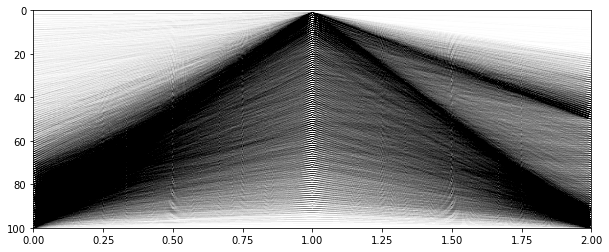

In [88]:
_, ax = plt.subplots(figsize=(10,4))

K = len(entrances) + 1

for a, b, c in zip(entrances[:K], peaks[:K], exits[:K]):
    if a != b != c: # remove constants
        ax.plot([0, 1, 2], [a, b, c], c="k", lw=.5, alpha=.01)

plt.xlim(0,2)
plt.ylim(0,100)
plt.gca().invert_yaxis() # smaller is better
plt.savefig("img/rise-decline.png", dpi=600)
plt.show()

**OBSERVATION**: At least 3 types:

- constants
- low in, peak, low out
- low in, peak, mid out

Try to disentangle what causes the difference